In [18]:
pip install --upgrade --force-reinstall scikit-learn joblib threadpoolctl numpy scipy


  Using cached scikit_learn-1.7.2-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached numpy-2.3.5-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached scipy-1.16.3-cp311-cp311-win_amd64.whl.metadata (60 kB)
Using cached scikit_learn-1.7.2-cp311-cp311-win_amd64.whl (8.9 MB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
Using cached numpy-2.3.5-cp311-cp311-win_amd64.whl (13.1 MB)
Using cached scipy-1.16.3-cp311-cp311-win_amd64.whl (38.7 MB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.6.0
    Uninstalling threadpoolctl-3.6.0:
      Successfully uninstalled threadpoolctl-3.6.0
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.5
    Uninstalling numpy-2.3.5:
      Successfully uninstalled numpy-2.3.5
  Attempting uninstall

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires patsy>=0.5.1, which is not installed.
category-encoders 2.7.0 requires statsmodels>=0.9.0, which is not installed.
easyocr 1.7.1 requires scikit-image, which is not installed.
keras 3.8.0 requires ml-dtypes, which is not installed.
mlflow 2.22.1 requires markdown<4,>=3.3, which is not installed.
mmcv-full 1.3.17 requires yapf, which is not installed.
pmdarima 2.0.4 requires statsmodels>=0.13.2, which is not installed.
pycaret 3.3.2 requires cloudpickle, which is not installed.
pycaret 3.3.2 requires ipywidgets>=7.6.5, which is not installed.
pycaret 3.3.2 requires kaleido>=0.2.1, which is not installed.
pycaret 3.3.2 requires nbformat>=4.2.0, which is not installed.
pycaret 3.3.2 requires numba>=0.55.0, which is not installed.
pycaret 3.3.2 requ

In [3]:
import pandas as pd
df = pd.read_csv("final_eto_output_azure_cleaned.csv")
print(df.columns.tolist())


['Min Temp o 0', 'Max Temp 0', 'Humidity ojo', 'Wind m/s\n:selected:', 'Sun hours', 'Rad MJ/m2 / day', 'ETo mm/ day', 'date']


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import joblib

# ------------------------------
# 1. Load your dataset
# ------------------------------
df = pd.read_csv("final_eto_output_azure_cleaned.csv")

# ------------------------------
# 2. Rename columns (corrected)
# ------------------------------
df = df.rename(columns={
    "Min Temp o 0": "min_temp",
    "Max Temp 0": "max_temp",
    "Humidity ojo": "humidity",
    "Wind m/s\n:selected:": "wind",   # FIXED newline issue
    "Sun hours": "sun_hours",
    "Rad MJ/m2 / day": "radiation",
    "ETo mm/ day": "eto",
    "date": "date"
})

# ------------------------------
# 3. Convert numeric features
# ------------------------------
num_cols = ["min_temp", "max_temp", "humidity", "wind", "sun_hours", "radiation", "eto"]
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce")

df = df.dropna()

# ------------------------------
# 4. Handle date
# ------------------------------
df["date"] = pd.to_datetime(df["date"])
# df["month"] = df["date"].dt.month
# df["day"] = df["date"].dt.day
# df["year"] = df["date"].dt.year
df = df.drop(columns=["date"])

# ------------------------------
# 5. Prepare Features & Target
# ------------------------------
X = df.drop(columns=["eto"])
y = df["eto"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------------------
# 6. Train Random Forest Model
# ------------------------------
model = RandomForestRegressor(
    n_estimators=300,
    max_depth=12,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

# ------------------------------
# 7. Evaluate Model
# ------------------------------
y_pred = model.predict(X_test)

# FIX for old sklearn versions (no 'squared=False')
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)

# ------------------------------
# 8. Save the model
# ------------------------------
joblib.dump(model, "eto_random_forest_model.pkl")
print("Model saved as eto_random_forest_model.pkl")


RMSE: 0.31064537668346875
R² Score: 0.9414575691141115
Model saved as eto_random_forest_model.pkl


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import joblib

# ------------------------------
# 1. Load your dataset
# ------------------------------
df = pd.read_csv("final_eto_output_azure_cleaned.csv")

# ------------------------------
# 2. Rename columns (corrected)
# ------------------------------
df = df.rename(columns={
    "Min Temp o 0": "min_temp",
    "Max Temp 0": "max_temp",
    "Humidity ojo": "humidity",
    "Wind m/s\n:selected:": "wind",   # FIXED newline issue
    "Sun hours": "sun_hours",
    "Rad MJ/m2 / day": "radiation",
    "ETo mm/ day": "eto",
    "date": "date"
})

# ------------------------------
# 3. Convert numeric features
# ------------------------------
num_cols = ["min_temp", "max_temp", "humidity", "wind", "sun_hours", "radiation", "eto"]
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce")

df = df.dropna()

# ------------------------------
# 4. Handle date
# ------------------------------
df["date"] = pd.to_datetime(df["date"])
# df["month"] = df["date"].dt.month
# df["day"] = df["date"].dt.day
# df["year"] = df["date"].dt.year
df = df.drop(columns=["date"])

# ------------------------------
# 5. Prepare Features & Target
# ------------------------------
X = df.drop(columns=["eto"])
y = df["eto"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------------------
# 6. Train Gradient Boosting Model
# ------------------------------
model = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)

model.fit(X_train, y_train)

# ------------------------------
# 7. Evaluate Model
# ------------------------------
y_pred = model.predict(X_test)

# FIX for old sklearn versions (no 'squared=False')
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)

# ------------------------------
# 8. Save the model
# ------------------------------
joblib.dump(model, "eto_gradient_boosting_model.pkl")
print("Model saved as eto_gradient_boosting_model.pkl")


RMSE: 0.3128429970904446
R² Score: 0.940626337596516
Model saved as eto_gradient_boosting_model.pkl


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import joblib
from xgboost import XGBRegressor

# ------------------------------
# 1. Load your dataset
# ------------------------------
df = pd.read_csv("final_eto_output_azure_cleaned.csv")

# ------------------------------
# 2. Rename columns (corrected)
# ------------------------------
df = df.rename(columns={
    "Min Temp o 0": "min_temp",
    "Max Temp 0": "max_temp",
    "Humidity ojo": "humidity",
    "Wind m/s\n:selected:": "wind",   # FIXED newline issue
    "Sun hours": "sun_hours",
    "Rad MJ/m2 / day": "radiation",
    "ETo mm/ day": "eto",
    "date": "date"
})

# ------------------------------
# 3. Convert numeric features
# ------------------------------
num_cols = ["min_temp", "max_temp", "humidity", "wind", "sun_hours", "radiation", "eto"]
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce")

df = df.dropna()

# ------------------------------
# 4. Handle date
# ------------------------------
df["date"] = pd.to_datetime(df["date"])
# df["month"] = df["date"].dt.month
# df["day"] = df["date"].dt.day
# df["year"] = df["date"].dt.year
df = df.drop(columns=["date"])

# ------------------------------
# 5. Prepare Features & Target
# ------------------------------
X = df.drop(columns=["eto"])
y = df["eto"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------------------
# 6. Train XGBoost Model
# ------------------------------
model = XGBRegressor(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)

model.fit(X_train, y_train)

# ------------------------------
# 7. Evaluate Model
# ------------------------------
y_pred = model.predict(X_test)

# FIX for old sklearn versions
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)

# ------------------------------
# 8. Save the model
# ------------------------------
joblib.dump(model, "eto_xgboost_model.pkl")
print("Model saved as eto_xgboost_model.pkl")


RMSE: 0.283107561567384
R² Score: 0.9513767592401878
Model saved as eto_xgboost_model.pkl


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import joblib
from lightgbm import LGBMRegressor

# ------------------------------
# 1. Load your dataset
# ------------------------------
df = pd.read_csv("final_eto_output_azure_cleaned.csv")

# ------------------------------
# 2. Rename columns (corrected)
# ------------------------------
df = df.rename(columns={
    "Min Temp o 0": "min_temp",
    "Max Temp 0": "max_temp",
    "Humidity ojo": "humidity",
    "Wind m/s\n:selected:": "wind",   # FIXED newline issue
    "Sun hours": "sun_hours",
    "Rad MJ/m2 / day": "radiation",
    "ETo mm/ day": "eto",
    "date": "date"
})

# ------------------------------
# 3. Convert numeric features
# ------------------------------
num_cols = ["min_temp", "max_temp", "humidity", "wind", "sun_hours", "radiation", "eto"]
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce")

df = df.dropna()

# ------------------------------
# 4. Handle date
# ------------------------------
df["date"] = pd.to_datetime(df["date"])
# df["month"] = df["date"].dt.month
# df["day"] = df["date"].dt.day
# df["year"] = df["date"].dt.year
df = df.drop(columns=["date"])

# ------------------------------
# 5. Prepare Features & Target
# ------------------------------
X = df.drop(columns=["eto"])
y = df["eto"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------------------
# 6. Train LightGBM Regressor
# ------------------------------
model = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,              # Let LightGBM decide
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)

# ------------------------------
# 7. Evaluate Model
# ------------------------------
y_pred = model.predict(X_test)

# FIX for old sklearn versions
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)

# ------------------------------
# 8. Save the model
# ------------------------------
joblib.dump(model, "eto_lightgbm_model.pkl")
print("Model saved as eto_lightgbm_model.pkl")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 597
[LightGBM] [Info] Number of data points in the train set: 9732, number of used features: 6
[LightGBM] [Info] Start training from score 5.671253
RMSE: 0.2791352593646724
R² Score: 0.9527316589911942
Model saved as eto_lightgbm_model.pkl


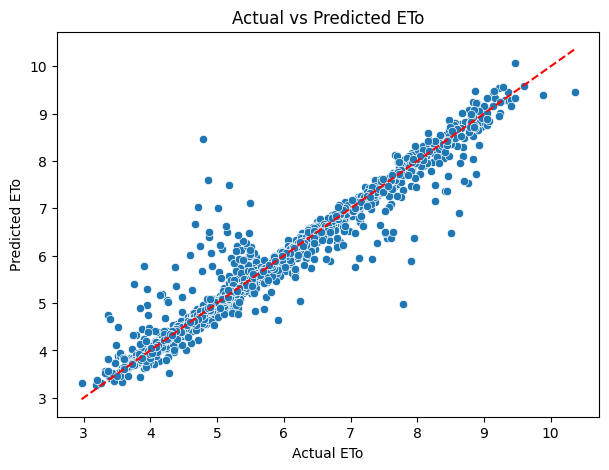

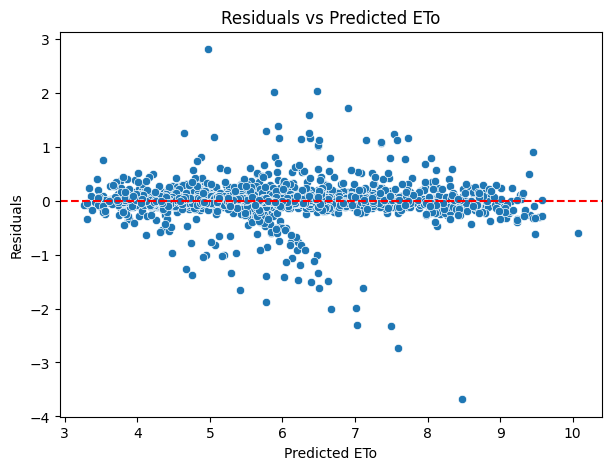

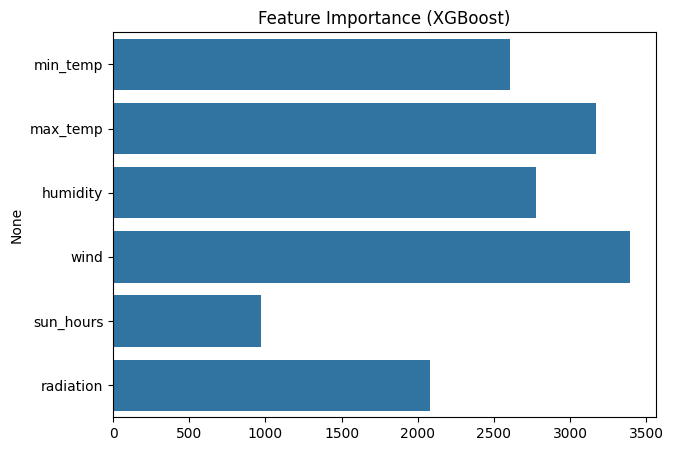

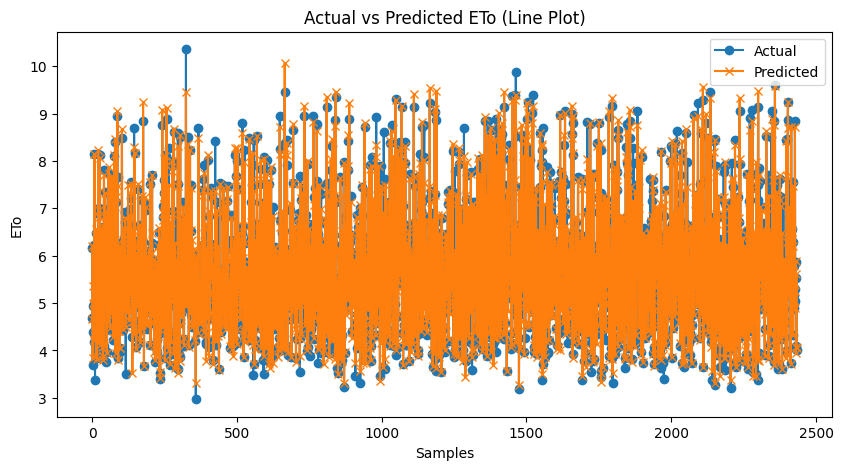

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------
# 1. Actual vs Predicted Scatter Plot
# ------------------------------
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual ETo")
plt.ylabel("Predicted ETo")
plt.title("Actual vs Predicted ETo")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

# ------------------------------
# 2. Residual Plot
# ------------------------------
residuals = y_test - y_pred

plt.figure(figsize=(7,5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted ETo")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted ETo")
plt.show()

# ------------------------------
# 3. XGBoost Feature Importance
# ------------------------------
plt.figure(figsize=(7,5))
xgb_importances = model.feature_importances_
sns.barplot(x=xgb_importances, y=X.columns)
plt.title("Feature Importance (XGBoost)")
plt.show()

# ------------------------------
# 4. Actual vs Predicted Line Plot (Sorted)
# ------------------------------
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual", marker="o")
plt.plot(y_pred, label="Predicted", marker="x")
plt.title("Actual vs Predicted ETo (Line Plot)")
plt.xlabel("Samples")
plt.ylabel("ETo")
plt.legend()
plt.show()


In [9]:
import joblib

# Load all 4 models
rf_model   = joblib.load("eto_random_forest_model.pkl")
gb_model   = joblib.load("eto_gradient_boosting_model.pkl")
xgb_model  = joblib.load("eto_xgboost_model.pkl")
lgbm_model = joblib.load("eto_lightgbm_model.pkl")

print("All 4 models loaded successfully!")


import numpy as np

# Example sample input
sample = {
    "min_temp": 22.5,
    "max_temp": 31.0,
    "humidity": 75,
    "wind": 2.8,
    "sun_hours": 11.5,
    "radiation": 27.9,
    # "month": 5,
    # "day": 15,
    # "year": 2024
}

# Convert to array
input_data = np.array([list(sample.values())])

# Run predictions
rf_pred   = rf_model.predict(input_data)[0]
gb_pred   = gb_model.predict(input_data)[0]
xgb_pred  = xgb_model.predict(input_data)[0]
lgbm_pred = lgbm_model.predict(input_data)[0]

print("\nPredictions:")
print("Random Forest:", rf_pred)
print("Gradient Boosting:", gb_pred)
print("XGBoost:", xgb_pred)
print("LightGBM:", lgbm_pred)


All 4 models loaded successfully!

Predictions:
Random Forest: 5.743126001546601
Gradient Boosting: 5.138285015774266
XGBoost: 5.4343743
LightGBM: 5.816887391638925


c:\Users\infyz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\infyz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Users\infyz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [10]:
import joblib
import numpy as np

# Load models
rf_model   = joblib.load("eto_random_forest_model.pkl")
gb_model   = joblib.load("eto_gradient_boosting_model.pkl")
xgb_model  = joblib.load("eto_xgboost_model.pkl")
lgbm_model = joblib.load("eto_lightgbm_model.pkl")

print("All 4 models loaded successfully!")

# Example sample input
sample = {
    "min_temp": 22.5,
    "max_temp": 31.0,
    "humidity": 75,
    "wind": 2.8,
    "sun_hours": 11.5,
    "radiation": 27.9
}

# Convert to array
input_data = np.array([list(sample.values())])

# Run predictions
rf_pred   = rf_model.predict(input_data)[0]
gb_pred   = gb_model.predict(input_data)[0]
xgb_pred  = xgb_model.predict(input_data)[0]
lgbm_pred = lgbm_model.predict(input_data)[0]

print("\nPredicted ETo (mm/day):")
print("Random Forest:", rf_pred)
print("Gradient Boosting:", gb_pred)
print("XGBoost:", xgb_pred)
print("LightGBM:", lgbm_pred)

# ========================================
#   ETc Calculation
#   Formula: ETc = Kc × ETo
# ========================================
Kc = 1.05  # Example crop coefficient

rf_etc   = Kc * rf_pred
gb_etc   = Kc * gb_pred
xgb_etc  = Kc * xgb_pred
lgbm_etc = Kc * lgbm_pred

print("\nETc (Crop Evapotranspiration) (mm/day):")
print(f"Random Forest ETc: {rf_etc:.4f}")
print(f"Gradient Boosting ETc: {gb_etc:.4f}")
print(f"XGBoost ETc: {xgb_etc:.4f}")
print(f"LightGBM ETc: {lgbm_etc:.4f}")


All 4 models loaded successfully!

Predicted ETo (mm/day):
Random Forest: 5.7431260015466
Gradient Boosting: 5.138285015774266
XGBoost: 5.4343743
LightGBM: 5.816887391638925

ETc (Crop Evapotranspiration) (mm/day):
Random Forest ETc: 6.0303
Gradient Boosting ETc: 5.3952
XGBoost ETc: 5.7061
LightGBM ETc: 6.1077


c:\Users\infyz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\infyz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Users\infyz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [29]:
import joblib
import numpy as np

# -----------------------------
# 1. Load all 4 models
# -----------------------------
rf_model   = joblib.load("eto_random_forest_model.pkl")
gb_model   = joblib.load("eto_gradient_boosting_model.pkl")
xgb_model  = joblib.load("eto_xgboost_model.pkl")
lgbm_model = joblib.load("eto_lightgbm_model.pkl")

print("All 4 models loaded successfully!")


# -----------------------------
# 2. Define Maize Kc Function using DAS
# -----------------------------
def get_maize_kc(das: float) -> float:
    """Return Kc for maize based on days after sowing."""
    
    if das < 0:
        raise ValueError("DAS cannot be negative.")
    
    # Initial: 0–25 → 0.30 → 0.40
    if 0 <= das < 25:
        kc_start, kc_end = 0.30, 0.40
        das_start, das_end = 0, 25

    # Development: 25–55 → 0.40 → 0.80
    elif 25 <= das < 55:
        kc_start, kc_end = 0.40, 0.80
        das_start, das_end = 25, 55

    # Mid-season: 55–95 → 1.15 → 1.20
    elif 55 <= das < 95:
        kc_start, kc_end = 1.15, 1.20
        das_start, das_end = 55, 95

    # Late season: 95–120 → 0.70 → 0.35
    elif 95 <= das <= 120:
        kc_start, kc_end = 0.70, 0.35
        das_start, das_end = 95, 120

    else:
        # After harvest (no growth)
        return 0.35

    # Linear interpolation
    kc = kc_start + (kc_end - kc_start) * ((das - das_start) / (das_end - das_start))
    return kc


# -----------------------------
# 3. Input Weather Features
# -----------------------------
sample = {
    "min_temp": 22.5,
    "max_temp": 31.0,
    "humidity": 75,
    "wind": 2.8,
    "sun_hours": 11.5,
    "radiation": 27.9
}

# -----------------------------
# 4. Input DAS (User Input)
# -----------------------------
days_after_sowing = int(input("Enter Days After Sowing (DAS): "))

kc = get_maize_kc(days_after_sowing)
print(f"\nDAS: {days_after_sowing} days")
print(f"Kc for maize: {kc:.3f}")


# -----------------------------
# 5. Predict ETo With All Models
# -----------------------------
input_data = np.array([list(sample.values())])

print("\nInput data for prediction:", input_data)
rf_pred   = rf_model.predict(input_data)[0]
gb_pred   = gb_model.predict(input_data)[0]
xgb_pred  = xgb_model.predict(input_data)[0]
lgbm_pred = lgbm_model.predict(input_data)[0]

# print("\nPredicted ETo (mm/day):")
# print(f"Random Forest:     {rf_pred:.4f}")
# print(f"Gradient Boosting: {gb_pred:.4f}")
# print(f"XGBoost:           {xgb_pred:.4f}")
# print(f"LightGBM:          {lgbm_pred:.4f}")


# -----------------------------
# 6. Compute ETc = Kc × ETo
# -----------------------------
rf_etc   = kc * rf_pred
gb_etc   = kc * gb_pred
xgb_etc  = kc * xgb_pred
lgbm_etc = kc * lgbm_pred

print("\nETc (predicted ETC) (mm/day):")
print(f"Random Forest ETc:     {rf_etc:.4f}")
print(f"Gradient Boosting ETc: {gb_etc:.4f}")
print(f"XGBoost ETc:           {xgb_etc:.4f}")
print(f"LightGBM ETc:          {lgbm_etc:.4f}")


All 4 models loaded successfully!

DAS: 55 days
Kc for maize: 1.150

Input data for prediction: [[22.5 31.  75.   2.8 11.5 27.9]]

ETc (predicted ETC) (mm/day):
Random Forest ETc:     6.6046
Gradient Boosting ETc: 5.9090
XGBoost ETc:           6.2495
LightGBM ETc:          6.6894


c:\Users\infyz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\infyz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
c:\Users\infyz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [30]:
pip show lightgbm


Name: lightgbm
Version: 4.6.0
Summary: LightGBM Python-package
Home-page: https://github.com/microsoft/LightGBM
Author: 
Author-email: 
License: The MIT License (MIT)

Copyright (c) Microsoft Corporation

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS O

In [23]:
import requests
import json

API_KEY = "36d15ab85147a133c827677a60d9ce4b"
lat = 13.936811
lon = 77.270029

url = f"https://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={API_KEY}"

response = requests.get(url)
data = response.json()

print("----- 5-DAY FORECAST DATA -----")
print(json.dumps(data, indent=4))


----- 5-DAY FORECAST DATA -----
{
    "cod": "200",
    "message": 0,
    "cnt": 40,
    "list": [
        {
            "dt": 1764601200,
            "main": {
                "temp": 293.94,
                "feels_like": 294.27,
                "temp_min": 293.94,
                "temp_max": 293.94,
                "pressure": 1014,
                "sea_level": 1014,
                "grnd_level": 936,
                "humidity": 84,
                "temp_kf": 0
            },
            "weather": [
                {
                    "id": 803,
                    "main": "Clouds",
                    "description": "broken clouds",
                    "icon": "04n"
                }
            ],
            "clouds": {
                "all": 60
            },
            "wind": {
                "speed": 4.03,
                "deg": 84,
                "gust": 7.72
            },
            "visibility": 10000,
            "pop": 0,
            "sys": {
                "pod"

In [ ]:
import requests
import json
from datetime import datetime
import math

API_KEY = "36d15ab85147a133c827677a60d9ce4b"
lat = 13.936811
lon = 77.270029

# -----------------------------
# GET TODAY'S WEATHER DATA
# -----------------------------93

url = f"https://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={API_KEY}&units=metric"
response = requests.get(url)
data = response.json()

today = datetime.utcnow().date()

temps_min = []
temps_max = []
humidities = []
winds = []
cloudiness = []

for entry in data["list"]:
    dt = datetime.utcfromtimestamp(entry["dt"]).date()
    if dt == today:
        temps_min.append(entry["main"]["temp_min"])
        temps_max.append(entry["main"]["temp_max"])
        humidities.append(entry["main"]["humidity"])
        winds.append(entry["wind"]["speed"])
        cloudiness.append(entry["clouds"]["all"])

if not temps_min:
    print("No weather data for today.")
    exit()


# -----------------------------
# DAILY AGGREGATION
# -----------------------------
min_temp = min(temps_min)
max_temp = max(temps_max)
humidity = sum(humidities)/len(humidities)
wind = sum(winds)/len(winds)
avg_clouds = sum(cloudiness)/len(cloudiness)

# Estimate sun hours
sun_hours = 12 * (1 - avg_clouds/100)

# Estimate solar radiation (FAO-56 method)
phi = math.radians(lat)
day_of_year = datetime.utcnow().timetuple().tm_yday

dr = 1 + 0.033 * math.cos(2*math.pi*day_of_year/365)
delta = 0.409 * math.sin(2*math.pi*day_of_year/365 - 1.39)
ws = math.acos(-math.tan(phi) * math.tan(delta))

Ra = (24*60/math.pi) * 0.0820 * dr * (
    ws * math.sin(phi) * math.sin(delta)
    + math.cos(phi)*math.cos(delta)*math.sin(ws)
)

radiation = (0.25 + 0.50*(1 - avg_clouds/100)) * Ra


# =====================================================
#            FAO-56 PENMAN–MONTEITH ETo
# =====================================================

T = (min_temp + max_temp) / 2

def saturation_vapor_pressure(T):
    return 0.6108 * math.exp((17.27*T)/(T+237.3))

es_min = saturation_vapor_pressure(min_temp)
es_max = saturation_vapor_pressure(max_temp)
es = (es_min + es_max) / 2
ea = (humidity/100) * es
vpd = es - ea
delta = (4098*es)/((T+237.3)**2)

altitude = 545
pressure = 101.3 * ((293 - 0.0065*altitude)/293)**5.26
gamma = 0.000665 * pressure

albedo = 0.23
Rns = (1 - albedo) * radiation

sigma = 4.903e-9
Tmax_K = max_temp + 273.16
Tmin_K = min_temp + 273.16

Rnl = sigma*((Tmax_K**4 + Tmin_K**4)/2) * \
      (0.34 - 0.14*math.sqrt(ea)) * \
      (1.35 - 0.35*(sun_hours/12))

Rn = Rns - Rnl
G = 0

ETo = (
    0.408*delta*(Rn - G)
    + gamma*(900/(T+273))*wind*vpd
) / (delta + gamma*(1 + 0.34*wind))


# =====================================================
#            MAIZE Kc FROM DAS
# =====================================================

def get_maize_kc(das: float) -> float:
    if das < 0:
        return 0.3
    
    if 0 <= das < 25:
        kc_start, kc_end = 0.30, 0.40
        d0, d1 = 0, 25
    elif 25 <= das < 55:
        kc_start, kc_end = 0.40, 0.80
        d0, d1 = 25, 55
    elif 55 <= das < 95:
        kc_start, kc_end = 1.15, 1.20
        d0, d1 = 55, 95
    elif 95 <= das <= 120:
        kc_start, kc_end = 0.70, 0.35
        d0, d1 = 95, 120
    else:
        return 0.35

    # Linear interpolation
    return kc_start + (kc_end - kc_start) * ((das - d0) / (d1 - d0))


# -----------------------------
# USER INPUT FOR DAS
# -----------------------------
das = int(input("Enter Days After Sowing (DAS): "))

kc = get_maize_kc(das)
ETc = kc * ETo


# -----------------------------
# FINAL OUTPUT JSON
# -----------------------------
output = {
    "min_temp": round(min_temp, 2),
    "max_temp": round(max_temp, 2),
    "humidity": round(humidity, 2),
    "wind": round(wind, 2),
    "sun_hours": round(sun_hours, 2),
    "radiation": round(radiation, 2),
    "eto": round(ETo, 4),
    "kc": round(kc, 3),
    "etc": round(ETc, 4)
}

print("\n----- TODAY'S WEATHER + ETo + Kc + ETc -----")
print(json.dumps(output, indent=4))



----- TODAY'S WEATHER + ETo + Kc + ETc -----
{
    "min_temp": 18.62,
    "max_temp": 20.79,
    "humidity": 87.67,
    "wind": 2.84,
    "sun_hours": 3.44,
    "radiation": 11.58,
    "eto": 1.1423,
    "kc": 1.154,
    "etc": 1.3179
}
